In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../Featre Engineering/New_KDDTrain+.txt')

In [4]:
df.head()

,count,srv_count,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,2,2,0.0,0.0,1.00,0.00,150,25,0.17,0.03,0.17,0.05,0.00,11
1,13,1,0.0,0.0,0.08,0.15,255,1,0.00,0.60,0.88,0.00,0.00,11
2,123,6,0.0,0.0,0.05,0.07,255,26,0.10,0.05,0.00,0.00,0.00,9
3,5,5,0.0,0.0,1.00,0.00,30,255,1.00,0.00,0.03,0.00,0.01,11
4,30,32,0.0,0.0,1.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 14 columns):
count                          125973 non-null int64
srv_count                      125973 non-null int64
rerror_rate                    125973 non-null float64
srv_rerror_rate                125973 non-null float64
same_srv_rate                  125973 non-null float64
diff_srv_rate                  125973 non-null float64
dst_host_count                 125973 non-null int64
dst_host_srv_count             125973 non-null int64
dst_host_same_srv_rate         125973 non-null float64
dst_host_diff_srv_rate         125973 non-null float64
dst_host_same_src_port_rate    125973 non-null float64
dst_host_rerror_rate           125973 non-null float64
dst_host_srv_rerror_rate       125973 non-null float64
labels                         125973 non-null int64
dtypes: float64(9), int64(5)
memory usage: 13.5 MB


In [6]:
df['labels'].nunique()

23

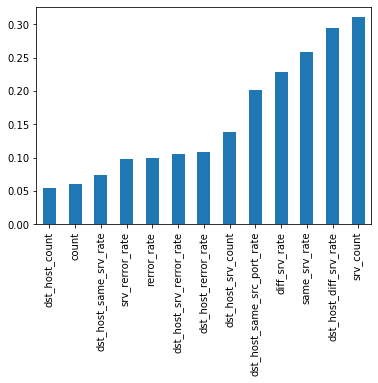

In [7]:
df.corr()['labels'][:-1].sort_values().plot(kind='bar')

In [8]:
X = df.drop('labels',axis=1).values
y = df['labels'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [11]:
df.shape

(125973, 14)

In [42]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(x=X_train,
          y=y_train,
          batch_size=256,
          epochs=100,
          validation_data=(X_test,y_test))

Train on 84401 samples, validate on 41572 samples
Epoch 1/100
84401/84401 [==============================] - 4s 42us/sample - loss: 1.2668e-06 - accuracy: 0.0065 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 2/100
84401/84401 [==============================] - 3s 39us/sample - loss: 1.2668e-06 - accuracy: 0.0065 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 3/100
84401/84401 [==============================] - 3s 40us/sample - loss: 1.2668e-06 - accuracy: 0.0065 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 4/100
84401/84401 [==============================] - 4s 42us/sample - loss: 1.2668e-06 - accuracy: 0.0066 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 5/100
84401/84401 [==============================] - 3s 40us/sample - loss: 1.2668e-06 - accuracy: 0.0066 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 6/100
84401/84401 [==============================] - 3s 41us/sample - loss: 1.2668e-06 - accuracy: 0.0066 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Ep

84401/84401 [==============================] - 3s 40us/sample - loss: 1.2668e-06 - accuracy: 0.0065 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 53/100
84401/84401 [==============================] - 4s 45us/sample - loss: 1.2668e-06 - accuracy: 0.0068 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 54/100
84401/84401 [==============================] - 3s 41us/sample - loss: 1.2668e-06 - accuracy: 0.0065 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 55/100
84401/84401 [==============================] - 4s 43us/sample - loss: 1.2668e-06 - accuracy: 0.0065 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 56/100
84401/84401 [==============================] - 3s 41us/sample - loss: 1.2668e-06 - accuracy: 0.0065 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 57/100
84401/84401 [==============================] - 3s 37us/sample - loss: 1.2668e-06 - accuracy: 0.0067 - val_loss: 1.2664e-06 - val_accuracy: 0.0075
Epoch 58/100
84401/84401 [==============================] -

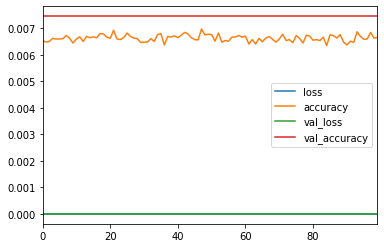

In [50]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [51]:
predication = model.predict_classes(X_test)

In [52]:
from sklearn.metrics import classification_report,accuracy_score

In [53]:
print(classification_report(y_test,predication))

              precision    recall  f1-score   support

           0       0.01      1.00      0.02       310
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00      1224
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00     13577
          10       0.00      0.00      0.00       512
          11       0.00      0.00      0.00     22193
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        70
          15       0.00      0.00      0.00       954
          16       0.00      0.00      0.00         4
          17       0.00    

In [54]:
print(accuracy_score(y_test,predication))

0.007456942172616184
